In [1]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment', None)

# Data preprocessing

In [2]:
birth = pd.read_csv("data/birth.csv")
breed = pd.read_csv("data/breed.csv")
report = pd.read_csv("data/report.csv")
spec = pd.read_csv("data/spec.csv")
submission = pd.read_csv("data/submission.csv")
report.head()

/Users/peter0512lee/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,1,2013,3,A,52612,507H7173,96040545,2011/1/1 00:00,1,78.0,...,2013/1/1 00:00,2013/3/20 00:00,26,2013/3/21 00:00,2015/5/5 00:00,507H11621,1,NaN,2013/3/5 00:00,501H8784
1,2,2013,4,A,52612,507H7173,96040545,2011/1/1 00:00,1,107.0,...,2013/1/1 00:00,2013/4/18 00:00,27,2013/4/19 00:00,2015/5/5 00:00,507H11621,1,NaN,2013/3/5 00:00,501H8784
2,3,2013,5,A,52612,507H7173,96040545,2011/1/1 00:00,1,140.0,...,2013/1/1 00:00,2013/5/21 00:00,28,2013/5/22 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784
3,4,2013,6,A,52612,507H7173,96040545,2011/1/1 00:00,1,175.0,...,2013/1/1 00:00,2013/6/25 00:00,29,2013/6/26 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784
4,5,2013,7,A,52612,507H7173,96040545,2011/1/1 00:00,1,210.0,...,2013/1/1 00:00,2013/7/30 00:00,30,2013/7/31 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784


In [3]:
train = report
test = report
train.info()
train.isna().sum()
test.info()
test.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37517 entries, 0 to 37516
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       37517 non-null  int64  
 1   2       37517 non-null  int64  
 2   3       37517 non-null  int64  
 3   4       37517 non-null  object 
 4   5       37517 non-null  int64  
 5   6       36641 non-null  object 
 6   7       33933 non-null  object 
 7   8       37517 non-null  object 
 8   9       37517 non-null  int64  
 9   10      37516 non-null  float64
 10  11      33254 non-null  float64
 11  12      37516 non-null  object 
 12  13      37517 non-null  object 
 13  14      37517 non-null  int64  
 14  15      37517 non-null  object 
 15  16      35981 non-null  object 
 16  17      35981 non-null  object 
 17  18      37517 non-null  int64  
 18  19      20097 non-null  object 
 19  20      36086 non-null  object 
 20  21      36086 non-null  object 
dtypes: float64(2), int64(7), object(12)

1         0
2         0
3         0
4         0
5         0
6       876
7      3584
8         0
9         0
10        1
11     4263
12        1
13        0
14        0
15        0
16     1536
17     1536
18        0
19    17420
20     1431
21     1431
dtype: int64

In [4]:
# 把train中乳量是空的刪掉
train = train.dropna(subset=['11'])
train.reset_index(drop=True, inplace=True)

In [5]:
test = test[test['11'].isnull()]
test.reset_index(drop=True, inplace=True)
test

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,480,2019,1,A,52631,501H9952,97040152,2011/3/17 00:00,4,435.0,...,2017/11/1 00:00,2019/1/10 00:00,94,2019/1/15 00:00,2019/2/3 00:00,551HO00657,6,2016/8/4 00:00,2018/1/6 00:00,614HO07276
1,742,2019,2,A,52640,501H9952,96040567,2011/4/1 00:00,4,13.0,...,2019/1/29 00:00,2019/2/11 00:00,94,2019/2/12 00:00,2019/2/28 00:00,551HO00695,0,2017/6/17 00:00,2019/2/28 00:00,551HO00695
2,743,2019,3,A,52640,501H9952,96040567,2011/4/1 00:00,4,35.0,...,2019/1/29 00:00,2019/3/5 00:00,95,2019/3/6 00:00,2019/2/28 00:00,551HO00695,1,2017/6/17 00:00,2019/2/28 00:00,551HO00695
3,744,2019,4,A,52640,501H9952,96040567,2011/4/1 00:00,4,70.0,...,2019/1/29 00:00,2019/4/9 00:00,96,2019/4/11 00:00,2019/2/28 00:00,551HO00695,1,2017/6/17 00:00,2019/2/28 00:00,551HO00695
4,745,2019,5,A,52640,501H9952,96040567,2011/4/1 00:00,4,98.0,...,2019/1/29 00:00,2019/5/7 00:00,97,2019/5/9 00:00,2019/2/28 00:00,551HO00695,1,2017/6/17 00:00,2019/2/28 00:00,551HO00695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,37481,2019,6,C,6187446,001HO11511,4170458.0,2017/6/1 00:00,1,15.0,...,2019/6/10 00:00,2019/6/25 00:00,24,2019/6/27 00:00,2019/7/24 00:00,001HO12901,0,NaN,2019/7/24 00:00,001HO12901
4259,37482,2019,6,C,6187448,001HO11511,3172306.0,2017/6/17 00:00,1,22.0,...,2019/6/3 00:00,2019/6/25 00:00,24,2019/6/27 00:00,NaN,NaN,0,NaN,NaN,NaN
4260,37483,2019,6,C,6187449,001HO11511,2176835.0,2017/8/10 00:00,1,21.0,...,2019/6/4 00:00,2019/6/25 00:00,22,2019/6/27 00:00,NaN,NaN,0,NaN,NaN,NaN
4261,37484,2019,7,C,6187449,001HO11511,2176835.0,2017/8/10 00:00,1,51.0,...,2019/6/4 00:00,2019/7/25 00:00,23,2019/7/26 00:00,NaN,NaN,0,NaN,NaN,NaN


In [6]:
# 將乳牛的空值填入平均體重
avg_weight = birth['6'].mean()
birth['6'] = birth['6'].fillna(birth['6'].mean())

In [7]:
train['6']=train['6'].fillna("NoData").astype("str")
train['7']=train['7'].fillna("NoData").astype("str")
train.dropna(subset=['6', '7', '10'], inplace=True)
train.dropna(axis='columns', inplace=True)

test['6']=test['6'].fillna("NoData").astype("str")
test['7']=test['7'].fillna("NoData").astype("str")

In [8]:
# train 合併 spec, 當年當月有病1, 沒病0
from datetime import datetime
train['health'] = 0
test['health'] = 0
for i in range(len(spec)):
    ym = datetime.strptime(spec['4'][i], "%Y/%m/%d %H:%M")
    if len(train.index[train["5"] == spec["1"][i]]) > 0:
        for j in train.index[train["5"] == spec["1"][i]]:
            if train['2'][j] == ym.year and train['3'][j] == ym.month and train['4'][j]==spec['7'][i]:
                train['health'][j] = 1
    if len(test.index[test["5"] == spec["1"][i]]) > 0:
        for j in test.index[test["5"] == spec["1"][i]]:
            if test['2'][j] == ym.year and test['3'][j] == ym.month and test['4'][j]==spec['7'][i]:
                test['health'][j] = 1

In [9]:
train['weight'] = np.nan
test['weight'] = np.nan
for i in range(len(birth)):
    if len(train.index[train['5'] == birth['1'][i]])>0:
        for j in train.index[train['5'] == birth['1'][i]]:
                train['weight'][j] = birth['6'][i]
    if len(test.index[test['5'] == birth['1'][i]])>0:
        for j in test.index[test['5'] == birth['1'][i]]:
                test['weight'][j] = birth['6'][i]
train['weight'] = train['weight'].fillna(avg_weight)
test['weight'] = test['weight'].fillna(avg_weight)

In [10]:
# 新增season欄位
train['season'] = ""
for index, row in train.iterrows():
    if int(train['3'][index]) >= 3 and int(train['3'][index]) <= 5:
        train['season'][index] = 'Spring'
    elif int(train['3'][index]) >= 6 and int(train['3'][index]) <= 8:
        train['season'][index] = 'Summer'
    elif int(train['3'][index]) >= 9 and int(train['3'][index]) <= 11:
        train['season'][index] = 'Autumn'
    else:
        train['season'][index] = 'Winter'

test['season'] = ""
for index, row in test.iterrows():
    if int(test['3'][index]) >= 3 and int(test['3'][index]) <= 5:
        test['season'][index] = 'Spring'
    elif int(test['3'][index]) >= 6 and int(test['3'][index]) <= 8:
        test['season'][index] = 'Summer'
    elif int(test['3'][index]) >= 9 and int(test['3'][index]) <= 11:
        test['season'][index] = 'Autumn'
    else:
        test['season'][index] = 'Winter'

In [11]:
train

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,18,health,weight,season
0,1,2013,3,A,52612,507H7173,96040545,2011/1/1 00:00,1,78.0,29.4,2013/1/1 00:00,2013/3/20 00:00,26,2013/3/21 00:00,1,0,576.584507,Spring
1,2,2013,4,A,52612,507H7173,96040545,2011/1/1 00:00,1,107.0,27.8,2013/1/1 00:00,2013/4/18 00:00,27,2013/4/19 00:00,1,0,576.584507,Spring
2,3,2013,5,A,52612,507H7173,96040545,2011/1/1 00:00,1,140.0,9.0,2013/1/1 00:00,2013/5/21 00:00,28,2013/5/22 00:00,2,0,576.584507,Spring
3,4,2013,6,A,52612,507H7173,96040545,2011/1/1 00:00,1,175.0,13.0,2013/1/1 00:00,2013/6/25 00:00,29,2013/6/26 00:00,2,0,576.584507,Summer
4,5,2013,7,A,52612,507H7173,96040545,2011/1/1 00:00,1,210.0,13.2,2013/1/1 00:00,2013/7/30 00:00,30,2013/7/31 00:00,2,0,576.584507,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33249,37513,2014,1,C,93184912,14H1999,85171537.0,2003/3/8 00:00,8,12.0,20.0,2014/1/8 00:00,2014/1/20 00:00,130,2014/1/21 00:00,0,0,725.000000,Winter
33250,37514,2014,5,C,93184912,14H1999,85171537.0,2003/3/8 00:00,8,137.0,21.0,2014/1/8 00:00,2014/5/25 00:00,134,2014/5/26 00:00,0,0,725.000000,Spring
33251,37515,2014,6,C,93184912,14H1999,85171537.0,2003/3/8 00:00,8,168.0,19.0,2014/1/8 00:00,2014/6/25 00:00,135,2014/6/26 00:00,0,0,725.000000,Summer
33252,37516,2014,7,C,93184912,14H1999,85171537.0,2003/3/8 00:00,8,197.0,12.0,2014/1/8 00:00,2014/7/24 00:00,136,2014/7/25 00:00,0,0,725.000000,Summer


In [12]:
test

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,health,weight,season
0,480,2019,1,A,52631,501H9952,97040152,2011/3/17 00:00,4,435.0,...,2019/1/15 00:00,2019/2/3 00:00,551HO00657,6,2016/8/4 00:00,2018/1/6 00:00,614HO07276,0,576.584507,Winter
1,742,2019,2,A,52640,501H9952,96040567,2011/4/1 00:00,4,13.0,...,2019/2/12 00:00,2019/2/28 00:00,551HO00695,0,2017/6/17 00:00,2019/2/28 00:00,551HO00695,0,576.584507,Winter
2,743,2019,3,A,52640,501H9952,96040567,2011/4/1 00:00,4,35.0,...,2019/3/6 00:00,2019/2/28 00:00,551HO00695,1,2017/6/17 00:00,2019/2/28 00:00,551HO00695,0,576.584507,Spring
3,744,2019,4,A,52640,501H9952,96040567,2011/4/1 00:00,4,70.0,...,2019/4/11 00:00,2019/2/28 00:00,551HO00695,1,2017/6/17 00:00,2019/2/28 00:00,551HO00695,0,576.584507,Spring
4,745,2019,5,A,52640,501H9952,96040567,2011/4/1 00:00,4,98.0,...,2019/5/9 00:00,2019/2/28 00:00,551HO00695,1,2017/6/17 00:00,2019/2/28 00:00,551HO00695,1,576.584507,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,37481,2019,6,C,6187446,001HO11511,4170458.0,2017/6/1 00:00,1,15.0,...,2019/6/27 00:00,2019/7/24 00:00,001HO12901,0,NaN,2019/7/24 00:00,001HO12901,0,540.000000,Summer
4259,37482,2019,6,C,6187448,001HO11511,3172306.0,2017/6/17 00:00,1,22.0,...,2019/6/27 00:00,NaN,NaN,0,NaN,NaN,NaN,0,490.000000,Summer
4260,37483,2019,6,C,6187449,001HO11511,2176835.0,2017/8/10 00:00,1,21.0,...,2019/6/27 00:00,NaN,NaN,0,NaN,NaN,NaN,0,540.000000,Summer
4261,37484,2019,7,C,6187449,001HO11511,2176835.0,2017/8/10 00:00,1,51.0,...,2019/7/26 00:00,NaN,NaN,0,NaN,NaN,NaN,0,540.000000,Summer


# Create model

In [13]:
new_train=pd.DataFrame(data=train,columns=['4','5','9','10','14','18','health','season','weight'])
new_test=pd.DataFrame(data=test,columns=['4','5','9','10','14','18','health','season','weight'])

In [14]:
#把要one hot的類別轉換成數字
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
all_data=pd.concat([new_train,new_test])
all_data['4'] = labelencoder.fit_transform(all_data['4'])
all_data['5'] = labelencoder.fit_transform(all_data['5'])
all_data['season'] = labelencoder.fit_transform(all_data['season'])
all_data['health'] = labelencoder.fit_transform(all_data['health'])
new_train = all_data[0:len(new_train)]
new_test = all_data[len(new_train)::]
all_data=pd.concat([new_train,new_test])

In [15]:
all_data

,4,5,9,10,14,18,health,season,weight
0,0,0,1,78.0,26,1,0,1,576.584507
1,0,0,1,107.0,27,1,0,1,576.584507
2,0,0,1,140.0,28,2,0,1,576.584507
3,0,0,1,175.0,29,2,0,2,576.584507
4,0,0,1,210.0,30,2,0,2,576.584507
...,...,...,...,...,...,...,...,...,...
4258,2,1463,1,15.0,24,0,0,2,540.000000
4259,2,1464,1,22.0,24,0,0,2,490.000000
4260,2,1465,1,21.0,22,0,0,2,540.000000
4261,2,1465,1,51.0,23,0,0,2,540.000000


In [16]:
#把要的類別轉換成one hot
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(all_data)
X = enc.transform(new_train).toarray()
X_test = enc.transform(new_test).toarray()
print(X.shape, X_test.shape)

(33253, 3098) (4263, 3098)


In [17]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,3088,3089,3090,3091,3092,3093,3094,3095,3096,3097
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33248,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33249,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33250,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33251,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
y = train['11']
y

0        29.4
1        27.8
2         9.0
3        13.0
4        13.2
         ... 
33249    20.0
33250    21.0
33251    19.0
33252    12.0
33253    10.0
Name: 11, Length: 33253, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [20]:
from keras import backend as K
def rmse(y_pred, y_true):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [43]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.optimizers import Adam

model=Sequential()
model.add(Dense(256, input_dim=3098, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss=rmse, optimizer="adam", metrics=[rmse])

In [44]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               793344    
_________________________________________________________________
dense_15 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 257       
Total params: 859,393
Trainable params: 859,393
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.fit(X,y,batch_size=64,epochs=200,verbose=1)

Epoch 1/200
520/520 [==============================] - 3s 4ms/step - loss: 10.0754 - rmse: 10.0754
Epoch 2/200
520/520 [==============================] - 2s 4ms/step - loss: 5.4436 - rmse: 5.4436
Epoch 3/200
520/520 [==============================] - 2s 4ms/step - loss: 4.9933 - rmse: 4.9933
Epoch 4/200
520/520 [==============================] - 2s 4ms/step - loss: 4.4104 - rmse: 4.4104
Epoch 5/200
520/520 [==============================] - 2s 4ms/step - loss: 3.9647 - rmse: 3.9647
Epoch 6/200
520/520 [==============================] - 2s 5ms/step - loss: 3.4981 - rmse: 3.4981
Epoch 7/200
520/520 [==============================] - 2s 4ms/step - loss: 3.1115 - rmse: 3.1115
Epoch 8/200
520/520 [==============================] - 2s 4ms/step - loss: 2.7867 - rmse: 2.7867
Epoch 9/200
520/520 [==============================] - 2s 4ms/step - loss: 2.5146 - rmse: 2.5146
Epoch 10/200
520/520 [==============================] - 2s 4ms/step - loss: 2.2564 - rmse: 2.2564
Epoch 11/200
520/520 [=====

In [46]:
from datetime import datetime

time = datetime.now().strftime("%Y_%m_%d-%H_%M_%S")
model.save('weights/' + time + '.h5')

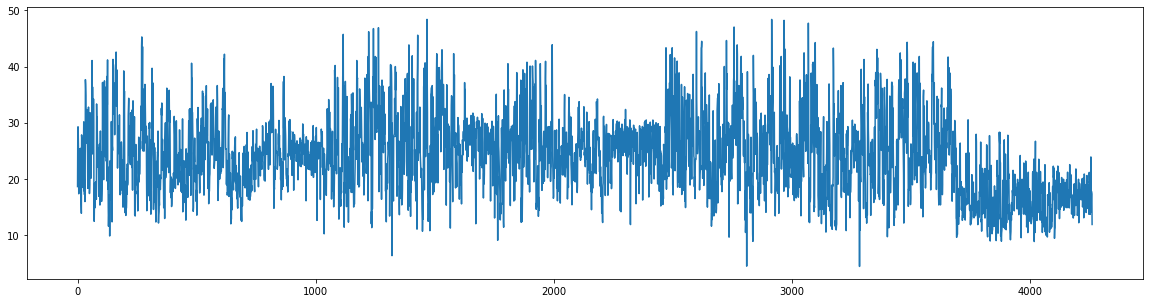

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

prediction=model.predict(X_test)
plt.figure(figsize=(20,5))
plt.plot(prediction)

In [48]:
from datetime import datetime

time = datetime.now().strftime("%Y_%m_%d-%H_%M_%S")
sub=pd.read_csv('data/submission.csv',sep=',')
sub['1']=prediction
sub.to_csv('output/' + time + '.csv',index=False)